 Optimization Lambda Parameter for Increese Classifcation Acuracy 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Required library


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.metrics import classification_report
import time

# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#svm
from sklearn import svm
#logestic regression
from sklearn.linear_model import LogisticRegression

# zscore / outlier removal
from scipy import stats

### Read Data

In [0]:
df_train = pd.read_csv('./dataset/shuttle.trn', delimiter=' ', header=None)


X = pd.read_csv('./Pre-preocess/X_ros', delimiter=' ', header=None)
y = pd.read_csv('./Pre-preocess/y_ros', delimiter=' ', header=None)
y1 = pd.read_csv('./Pre-preocess/y_smt', delimiter=' ', header=None)
X_test = pd.read_csv('./Pre-preocess/X_test', delimiter=' ', header=None)
y_test = pd.read_csv('./Pre-preocess/y_test', delimiter=' ', header=None)

df_train.head()


,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


In [0]:

df = df_train.iloc[:, 0]
print(df.isnull().values.ravel().sum())
time=np.asarray(df_train.iloc[:,0])
sortedTime = np.sort(time)
print(type(sortedTime))
df_train.describe()
y0_df = df_train
y1_df= df_train

### Simualation Of Data Set lambda0 and lambda1


        0   1    2  3   4   5   6   7   8  9
0      50  21   77  0  28   0  27  48  22  2
1      55   0   92  0   0  26  36  92  56  4
2      53   0   82  0  52  -5  29  30   2  1
3      37   0   76  0  28  18  40  48   8  1
4      37   0   79  0  34 -26  43  46   2  1
...    ..  ..  ... ..  ..  ..  ..  ..  .. ..
43495  46   5   78  0  46   5  32  32   0  1
43496  37   0   79 -1  10   3  43  69  26  1
43497  48   0   78  3  46   0  30  32   2  1
43498  41   0   79  0  38 -25  38  40   2  1
43499  40  -3  100  0  38   0  61  62   2  1

[43500 rows x 10 columns]


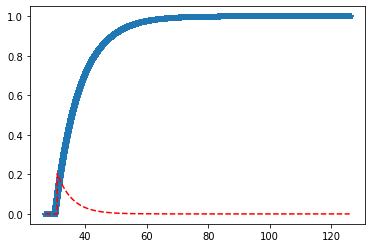

In [0]:

x = np.linspace(27, 126, 43500) 
  
# Varying positional arguments 
y0 = expon.cdf(x, 30, 8) 
y1 = expon.pdf(x,30.9,4.9) 
plt.plot(x, y0, "*", x, y1, "r--") 
y0_df ['0']= y0
y0_df = y0_df.iloc[:, :-1]
y1_df ['0']= y1
y1_df = y1_df.iloc[:, :-1]


### lambda0 Dataset Training Test

In [0]:
# best params----KNN
X_train, y_train = y0_df.iloc[:, :-1], y0_df.iloc[:, -1]
knn = KNeighborsClassifier(5)
# fit
knn.fit(X_train, y_train)
# best params----SVM
svm_model = svm.SVC(gamma=0.001, kernel='rbf', C=0.001)
# fit
svm_model.fit(X_train, y_train)
# best params----LR
lr = LogisticRegression(solver='liblinear', C=8, random_state=0)
# fit
lr.fit(X_train, y_train)

knn_lambda0_pred = knn.predict(X_test)
svm_lambda0_pred = svm_model.predict(X_test)
lr_lambda0_pred = lr.predict(X_test)


### Validtion lambda0

```
# This is formatted as code
```

 Test

In [0]:
print("KNN Classification: ")
print(classification_report(knn_lambda0_pred, y_test))

print("SVM Classification: ")
print(classification_report(svm_lambda0_pred, y_test))

print("LR Classification: ")
print(classification_report(lr_lambda0_pred, y_test))

KNN Classification: 
              precision    recall  f1-score   support

           1       1.00      0.79      0.88     14500
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.79     14500
   macro avg       0.14      0.11      0.13     14500
weighted avg       1.00      0.79      0.88     14500

SVM Classification: 
              precision    recall  f1-score   support

           1       1.00      0.79      0.88     14500
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### lambda1 Dataset Training Test

> Indented block



In [0]:
# best params----KNN
X_train, y_train = y1_df.iloc[:, :-1], y1_df.iloc[:, -1]

knn = KNeighborsClassifier(5)
# fit
knn.fit(X_train, y_train)

# best params----SVM

svm_model = svm.SVC(gamma=0.001, kernel='rbf', C=0.001)
# fit
svm_model.fit(X_train, y_train)


# best params----LR

lr = LogisticRegression(solver='liblinear', C=8, random_state=0)
# fit
lr.fit(X_train, y_train)

knn_lambda1_pred = knn.predict(X_test)
svm_lambda1_pred = svm_model.predict(X_test)
lr_lambda1_pred = lr.predict(X_test)


### Validtion lambda1



In [0]:
print("KNN Classification: ")
print(classification_report(knn_lambda1_pred, y_test))

print("SVM Classification: ")
print(classification_report(svm_lambda1_pred, y_test))

print("LR Classification: ")
print(classification_report(lr_lambda1_pred, y_test))

KNN Classification: 
              precision    recall  f1-score   support

           1       1.00      0.79      0.88     14500
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.79     14500
   macro avg       0.14      0.11      0.13     14500
weighted avg       1.00      0.79      0.88     14500

SVM Classification: 
              precision    recall  f1-score   support

           1       1.00      0.79      0.88     14500
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
